In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mezcla_1'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 500


In [ ]:
import os
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
nombres_plantas = {
    'albahacas_recortadas_Albahaca': 0,
    'hojasTomillo_recortadas_tomillo': 1,
    'malvas_recortadas_malva': 2,
    'ruculaRedimensionadas_rucula': 3,
    'zoom_hinojo': 4
}

# Ruta principal donde están las imágenes mezcladas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mezcla_1'

# Ruta para guardar el archivo en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas.pkl'

# Lista para almacenar el dataset completo
dataset = []

# Recorrer todos los archivos en la carpeta
for nombre_imagen in os.listdir(ruta_principal):
    imagen_path = os.path.join(ruta_principal, nombre_imagen)

    # Comprobar si el archivo es una imagen
    if nombre_imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Identificar la planta a partir del nombre del archivo
        planta_en_nombre = None
        for clave in nombres_plantas:
            if clave in nombre_imagen:
                planta_en_nombre = nombres_plantas[clave]
                break

        if planta_en_nombre is not None:
            # Cargar la imagen
            imagen = Image.open(imagen_path)

            # Convertir la imagen a un array de NumPy
            imagen_array = np.array(imagen)

            # Añadir el par (imagen_array, etiqueta) al dataset
            dataset.append((imagen_array, planta_en_nombre))

# Guardar el dataset completo usando pickle
with open(ruta_guardado, 'wb') as f:
    pickle.dump(dataset, f)

print(f"Dataset guardado en {ruta_guardado}. Total de imágenes procesadas: {len(dataset)}")

Dataset guardado en /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/Pruebas_dataHojas.pkl. Total de imágenes procesadas: 200


In [ ]:
import os
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
nombres_plantas = {
    'albahacas_recortadas_Albahaca': 0,
    'hojasTomillo_recortadas_tomillo': 1,
    'malvas_recortadas_malva': 2,
    'ruculaRedimensionadas_rucula': 3,
    'zoom_hinojo': 4
}

# Ruta principal donde están las imágenes mezcladas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/pruebas'

# Ruta para guardar los archivos en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData'

# Variables para controlar el procesamiento por lotes
lote_tamano = 500
lote_actual = 1
contador_imagenes = 0
dataset = []

# Recorrer todos los archivos en la carpeta
for nombre_imagen in os.listdir(ruta_principal):
    imagen_path = os.path.join(ruta_principal, nombre_imagen)

    # Comprobar si el archivo es una imagen
    if nombre_imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Identificar la planta a partir del nombre del archivo
        planta_en_nombre = None
        for clave in nombres_plantas:
            if clave in nombre_imagen:
                planta_en_nombre = nombres_plantas[clave]
                break

        if planta_en_nombre is not None:
            # Cargar la imagen
            imagen = Image.open(imagen_path)

            # Convertir la imagen a un array de NumPy
            imagen_array = np.array(imagen)

            # Añadir el par (imagen_array, etiqueta) al dataset
            dataset.append((imagen_array, planta_en_nombre))
            contador_imagenes += 1

            # Si alcanzamos el tamaño del lote, guardar y liberar memoria
            if contador_imagenes == lote_tamano:
                # Guardar el dataset usando pickle
                with open(ruta_guardado + f'TestDataHojas_{lote_actual}.pkl', 'wb') as f:
                    pickle.dump(dataset, f)

                # Liberar memoria
                dataset = []
                contador_imagenes = 0
                lote_actual += 1

# Guardar el último lote si queda algo en el dataset
if len(dataset) > 0:
    with open(ruta_guardado + f'dataHojas_{lote_actual}.pkl', 'wb') as f:
        pickle.dump(dataset, f)

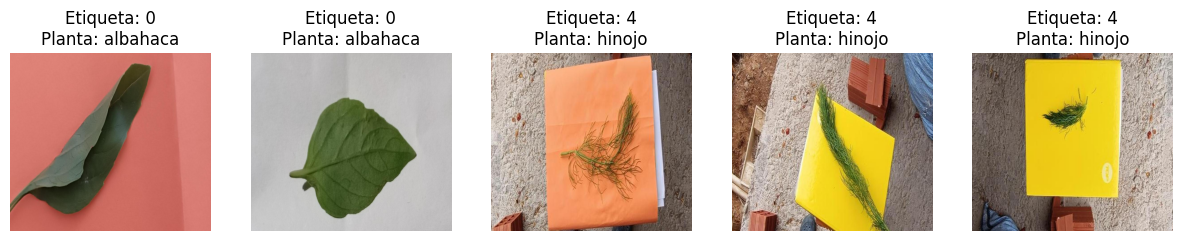

In [ ]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np

# Definir el mapeo de etiquetas a nombres de plantas
etiquetas_a_nombres = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo .pkl
archivo_pkl = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas_1.pkl'

# Cargar el dataset desde el archivo .pkl
with open(archivo_pkl, 'rb') as f:
    dataset = pickle.load(f)

# Seleccionar 5 pares aleatorios
num_pares_a_mostrar = 5
pares_random = random.sample(dataset, num_pares_a_mostrar)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, num_pares_a_mostrar, figsize=(15, 5))

# Mostrar cada imagen
for i, (imagen_array, etiqueta) in enumerate(pares_random):
    ax = axes[i]
    ax.imshow(np.squeeze(imagen_array), cmap='gray')  # Squeeze para eliminar dimensiones de tamaño 1
    nombre_planta = etiquetas_a_nombres.get(etiqueta, 'Desconocido')
    ax.set_title(f'Etiqueta: {etiqueta}\nPlanta: {nombre_planta}')
    ax.axis('off')

plt.show()

In [ ]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo pickle
ruta_archivo_pickle = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas_1.pkl'

# Cargar el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar el dataset desde el archivo pickle
dataset = cargar_pickle(ruta_archivo_pickle)

# Crear un diccionario para almacenar las imágenes y etiquetas por planta
imagenes_por_planta = {i: [] for i in nombres_plantas.keys()}

# Dividir el dataset en imágenes y etiquetas por planta
for imagen_array, etiqueta in dataset:
    if etiqueta in imagenes_por_planta:
        imagenes_por_planta[etiqueta].append(imagen_array)

# Seleccionar 24 pares por planta
imagenes_seleccionadas = {i: random.sample(imagenes, 24) for i, imagenes in imagenes_por_planta.items()}

# Inicializar listas para almacenar las imágenes y etiquetas de entrenamiento y prueba
total_images = []
total_labels = []
test_images_total = []
test_labels_total = []

# Dividir en conjuntos de entrenamiento y prueba
for etiqueta, imagenes in imagenes_seleccionadas.items():
    random.shuffle(imagenes)  # Barajar las imágenes
    # Seleccionar 20 pares para entrenamiento y 4 pares para prueba
    total_images.extend(imagenes[:20])
    total_labels.extend([etiqueta] * 20)
    test_images_total.extend(imagenes[20:])
    test_labels_total.extend([etiqueta] * 4)

# Convertir listas a arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)
test_images = np.array(test_images_total)
test_labels = np.array(test_labels_total)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de train_images: (100, 800, 900, 3)
Dimensiones de train_labels: (100,)
Dimensiones de test_images: (20, 800, 900, 3)
Dimensiones de test_labels: (20,)


In [ ]:
# tipo de datos

train_images.dtype, train_labels.dtype

(dtype('uint8'), dtype('int64'))

In [ ]:
max_value = train_images.max(axis=(0, 1, 2))
min_value = train_images.min(axis=(0, 1, 2))

max_value, min_value

(array([255, 255, 255], dtype=uint8), array([0, 0, 0], dtype=uint8))

In [ ]:
mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.63705608, 0.53684154, 0.47126321]),
 array([0.22446534, 0.20902257, 0.24930519]))

In [ ]:
import random
import matplotlib.pyplot as plt

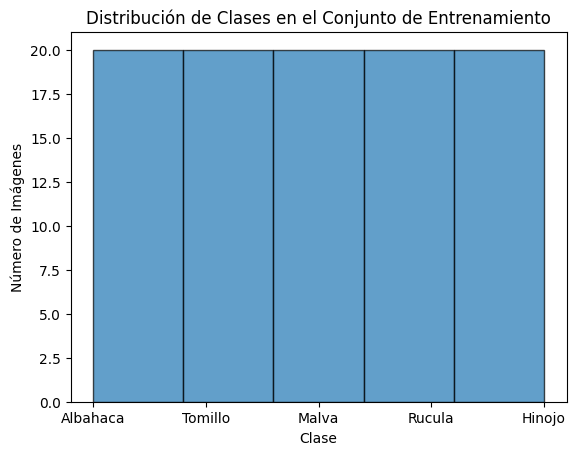

In [ ]:
# Definir las clases
clases = ['Albahaca', 'Tomillo', 'Malva', 'Rucula', 'Hinojo']

# Visualizar la distribución de clases en el conjunto de entrenamiento
plt.hist(train_labels, bins=len(clases), edgecolor='black', alpha=0.7, range=(0, len(clases)-1))

# Configurar el gráfico
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(ticks=range(len(clases)), labels=clases)

# Mostrar el gráfico
plt.show()

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([20, 20, 20, 20, 20]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Configuración inicial
input_dim = 800 * 900 * 3  # Tamaño de la imagen plana
hidden_units = 50  # Número de unidades en la capa oculta
output_dim = 5  # Número de clases ajustado a 5 (albahaca, tomillo, malva, rúcula, hinojo)
epochs = 10  # Número de epochs
checkpoint_path = "/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/model_checkpoint.pth"  # Ruta para guardar el modelo


In [ ]:
# Convertir a tensores de PyTorch y mover a GPU
train_images = torch.tensor(train_images, dtype=torch.float32).view(-1, input_dim).cuda()
test_images = torch.tensor(test_images, dtype=torch.float32).view(-1, input_dim).cuda()
train_labels = torch.tensor(train_labels, dtype=torch.long).cuda()
test_labels = torch.tensor(test_labels, dtype=torch.long).cuda()

In [ ]:
# Definición del modelo
def build_model(D_in=input_dim, H=hidden_units, D_out=output_dim):
    return nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, H),  # Capa adicional con mismas unidades neuronales
        nn.ReLU(),
        nn.Linear(H, D_out)
    ).cuda()  # Mover el modelo a la GPU

In [ ]:
# Crear el modelo
model = build_model()

In [ ]:

# Crear un lote de prueba para verificar la forma de salida
test_input = torch.randn((64, input_dim)).cuda()  # Batch de prueba
test_output = model(test_input)
print(test_output.shape)  # Debería ser torch.Size([64, 5])

torch.Size([64, 5])


In [ ]:
# Función de entrenamiento
def train_model(model, train_images, train_labels, epochs, checkpoint_path):
    criterion = nn.CrossEntropyLoss()  # Usaremos CrossEntropyLoss para clasificación
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

    # Convertir a tensores de PyTorch y mover a GPU
    train_images = torch.tensor(train_images, dtype=torch.float32).view(-1, input_dim).cuda()
    train_labels = torch.tensor(train_labels, dtype=torch.long).cuda()

    for epoch in range(epochs):
        model.train()  # Poner el modelo en modo entrenamiento

        # Forward pass
        outputs = model(train_images)
        loss = criterion(outputs, train_labels)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Guardar checkpoint
        torch.save(model.state_dict(), checkpoint_path)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

        # Liberar memoria
        del outputs, loss
        torch.cuda.empty_cache()


In [ ]:

# Entrenar el modelo
train_model(model, train_images, train_labels, epochs, checkpoint_path)

<ipython-input-10-d52e08ee5fc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_images = torch.tensor(train_images, dtype=torch.float32).view(-1, input_dim).cuda()
<ipython-input-10-d52e08ee5fc1>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.long).cuda()


Epoch [1/10], Loss: 8.8809
Epoch [2/10], Loss: 88501.7500
Epoch [3/10], Loss: 20439.6719
Epoch [4/10], Loss: 26426.6875
Epoch [5/10], Loss: 5893.5986
Epoch [6/10], Loss: 20152.7812
Epoch [7/10], Loss: 24727.6016
Epoch [8/10], Loss: 14694.8037
Epoch [9/10], Loss: 1418.3594
Epoch [10/10], Loss: 11634.8389


# **Fit de una muestra**

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
# Supongamos que ya has convertido tus imágenes y etiquetas en arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)

In [ ]:
# Como solo estamos usando la primera imagen para este fit, seleccionamos la primera
X_subset = train_images[:1]
y_subset = train_labels[:1]

In [ ]:
# Imprimir los primeros cinco valores
print("Primeros cinco valores de X_subset:")
print(X_subset.flatten()[:5])  # Aplanar la imagen y tomar los primeros 5 valores

Primeros cinco valores de X_subset:
[199 197 200 200 198]


In [ ]:
print(X_subset.shape)  # Debe mostrar (1, 800, 900, 3)

(1, 800, 900, 3)


In [ ]:
# Definir el Dataset personalizado
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 800*900*3)  # Ajustar el tamaño de entrada
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# Crear un DataLoader para la primera imagen
dataset = Dataset(X_subset, y_subset)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1)

In [ ]:
print(len(dataset))  # Verificar que el tamaño del dataset es 1

1


In [ ]:
import random
import torch

# Función para tomar 10 elementos aleatorios de un DataLoader
def get_random_samples(dataloader, num_samples=1):
    data_list = []

    # Iterar sobre el DataLoader para recoger los datos
    for batch in dataloader:
        images, labels = batch  # Desempaquetar el batch
        for i in range(len(images)):
            data_list.append((images[i], labels[i]))  # Agregar datos individuales a la lista

    # Asegurarse de que tenemos suficientes datos
    if len(data_list) < num_samples:
        raise ValueError("El DataLoader contiene menos elementos que el número de muestras solicitadas.")

    # Seleccionar elementos aleatorios
    random_samples = random.sample(data_list, num_samples)

    return random_samples

# Obtener 10 elementos aleatorios del DataLoader de entrenamiento
random_samples = get_random_samples(dataloader, num_samples=1)

print("10 elementos aleatorios del train_dataloader:")
for img, label in random_samples:
    print(f"Imagen: {img.shape}, Etiqueta: {label.item()}")


10 elementos aleatorios del train_dataloader:
Imagen: torch.Size([2160000]), Etiqueta: 0


In [ ]:
# Iterando sobre el train_dataloader
print("Primeros cinco elementos del train_dataloader:")
for i, data in enumerate(dataset):
    if i < 1:
        print(data)
    else:
        break

Primeros cinco elementos del train_dataloader:
(tensor([0.7804, 0.7725, 0.7843,  ..., 0.7020, 0.6863, 0.6902], device='cuda:0'), tensor(0, device='cuda:0'))


In [ ]:
def build_model(D_in=800*900*3, H=100, D_out=5):
    return nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, H),
        nn.ReLU(),
        nn.Linear(H, D_out)
    ).cuda()

# Instanciar el modelo
model = build_model()

In [ ]:
# Definir los parámetros del entrenamiento
epochs = 10  # Puedes ajustar el número de epochs según tus necesidades
criterion = nn.CrossEntropyLoss()  # Usamos CrossEntropyLoss para la clasificación
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento
for e in range(1, epochs + 1):
    for x_b, y_b in dataloader:
        y_pred = model(x_b)  # Paso hacia adelante
        loss = criterion(y_pred, y_b)  # Calcular la pérdida
        optimizer.zero_grad()  # Limpiar los gradientes
        loss.backward()  # Retropropagación
        optimizer.step()  # Actualizar los parámetros del modelo

        # Imprimir la pérdida y predicción
        print(f"Epoch {e}/{epochs} loss {loss.item():.5f} y {y_b.item()} y_pred {torch.argmax(y_pred, axis=1).item()}")

Epoch 1/10 loss 1.60236 y 0 y_pred 4
Epoch 2/10 loss 0.00000 y 0 y_pred 0
Epoch 3/10 loss 0.00000 y 0 y_pred 0
Epoch 4/10 loss 0.00000 y 0 y_pred 0
Epoch 5/10 loss 0.00000 y 0 y_pred 0
Epoch 6/10 loss 0.00000 y 0 y_pred 0
Epoch 7/10 loss 0.00000 y 0 y_pred 0
Epoch 8/10 loss 0.00000 y 0 y_pred 0
Epoch 9/10 loss 0.00000 y 0 y_pred 0
Epoch 10/10 loss 0.00000 y 0 y_pred 0


# **Fit de un batch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Supongamos que ya has convertido tus imágenes y etiquetas en arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)

In [ ]:
# Definir el Dataset personalizado
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 800*900*3)  # Normalización y ajuste del tamaño
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# Convertir los datos de prueba a tensores y normalizarlos
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 800*900*3)  # Normalización y ajuste del tamaño
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# Crear un DataLoader para los datos de prueba
test_dataset = TestDataset(test_images, test_labels)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
print(len(test_dataset))  # Verificar que el tamaño del dataset es el esperado

20


In [ ]:
# Crear un DataLoader para todo el dataset, usando batches de tamaño 64
dataset = Dataset(train_images, train_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
print(len(dataset))  # Verificar que el tamaño del dataset es el esperado

100


In [ ]:
# Iterando sobre el train_dataloader
print("Primeros cinco elementos del train_dataloader:")
for i, data in enumerate(dataset):
    if i < 5:
        print(data)
    else:
        break

Primeros cinco elementos del train_dataloader:
(tensor([0.7804, 0.7725, 0.7843,  ..., 0.7020, 0.6863, 0.6902], device='cuda:0'), tensor(0, device='cuda:0'))
(tensor([0.6824, 0.5569, 0.6157,  ..., 0.7804, 0.6588, 0.7216], device='cuda:0'), tensor(0, device='cuda:0'))
(tensor([0.7725, 0.7529, 0.7686,  ..., 0.6549, 0.6353, 0.6510], device='cuda:0'), tensor(0, device='cuda:0'))
(tensor([0.8510, 0.7725, 0.8196,  ..., 0.7529, 0.6549, 0.7294], device='cuda:0'), tensor(0, device='cuda:0'))
(tensor([0.8431, 0.7882, 0.8471,  ..., 0.7882, 0.7176, 0.7804], device='cuda:0'), tensor(0, device='cuda:0'))


# **Fit de un subConjunto**

In [ ]:
# Definir el Dataset y DataLoader para el conjunto de entrenamiento
dataset = {
    'train': Dataset(train_images, train_labels),
    'val': Dataset(test_images, test_labels),  # Usaremos el conjunto de prueba como validación
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=16, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=16, shuffle=False)
}

In [ ]:
from sklearn.metrics import accuracy_score
import torch

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

In [ ]:
import gc

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=30, log_each=1, weight_decay=0, early_stopping=0, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mejorModeloSubConjunto.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mejorModeloSubConjunto.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
lrs = [0.0002, 0.0001,0.002,0.00015]
hists = []

In [ ]:
for lr in lrs:
    print(f"Probando lr {lr}")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=30, verbose=0)
    hists.append(hist)

Probando lr 0.0002
Epoch 1/30 - Train Loss: 38.75593, Train Acc: 0.17857, Val Loss: 22.60687, Val Acc: 0.12500
Epoch 2/30 - Train Loss: 17.61462, Train Acc: 0.30357, Val Loss: 9.57012, Val Acc: 0.25000
Epoch 3/30 - Train Loss: 6.99875, Train Acc: 0.41964, Val Loss: 7.71713, Val Acc: 0.18750
Epoch 4/30 - Train Loss: 5.84369, Train Acc: 0.51786, Val Loss: 6.55944, Val Acc: 0.53125
Epoch 5/30 - Train Loss: 5.08265, Train Acc: 0.60714, Val Loss: 5.07280, Val Acc: 0.56250
Epoch 6/30 - Train Loss: 5.88895, Train Acc: 0.52679, Val Loss: 1.38446, Val Acc: 0.75000
Epoch 7/30 - Train Loss: 1.43753, Train Acc: 0.71429, Val Loss: 1.82955, Val Acc: 0.71875
Epoch 8/30 - Train Loss: 2.36299, Train Acc: 0.69643, Val Loss: 0.82051, Val Acc: 0.75000
Epoch 9/30 - Train Loss: 2.29610, Train Acc: 0.66071, Val Loss: 0.53437, Val Acc: 0.84375
Epoch 10/30 - Train Loss: 1.48326, Train Acc: 0.66071, Val Loss: 1.64919, Val Acc: 0.78125
Epoch 11/30 - Train Loss: 2.51910, Train Acc: 0.65179, Val Loss: 2.17337, Val

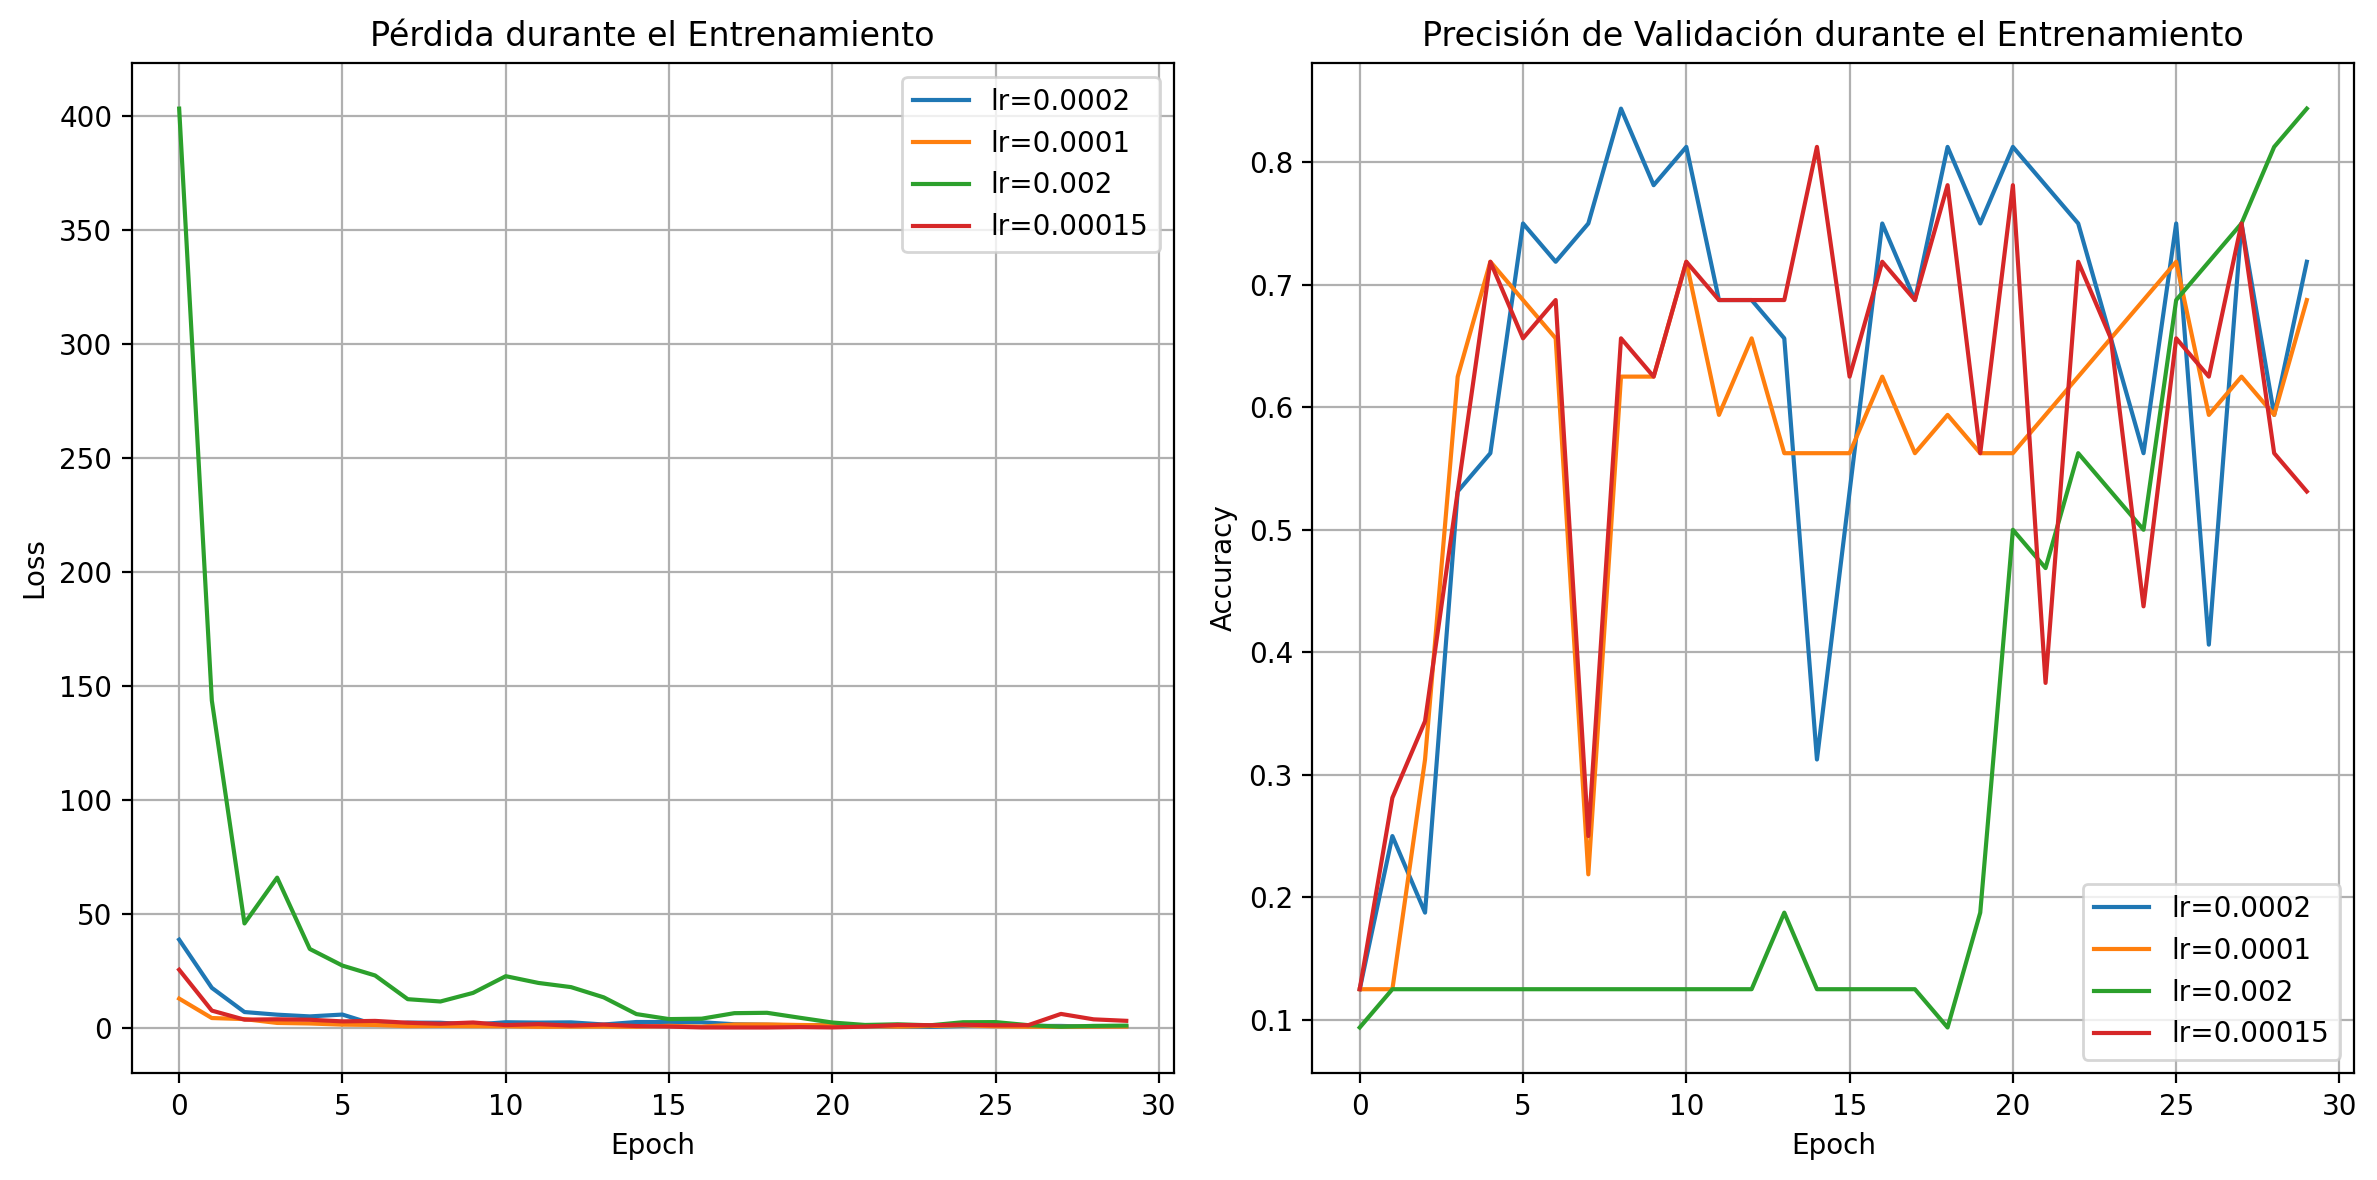

In [ ]:
import matplotlib.pyplot as plt

# Visualización
fig = plt.figure(dpi=200, figsize=(12, 6))

# Gráfico de pérdida
ax1 = plt.subplot(121)
for i in range(len(lrs)):
    ax1.plot(hists[i]['loss'], label=f'lr={lrs[i]}')
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Pérdida durante el Entrenamiento')

# Gráfico de precisión de validación
ax2 = plt.subplot(122)
for i in range(len(lrs)):
    ax2.plot(hists[i]['val_acc'], label=f'lr={lrs[i]}')
ax2.legend()
ax2.grid(True)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_title('Precisión de Validación durante el Entrenamiento')

plt.tight_layout()
plt.show()

# **Entrenando con todos los datos**

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 593
Número de imágenes en la carpeta: 442
Número de imágenes en la carpeta: 460
Número de imágenes en la carpeta: 476
Número de imágenes en la carpeta: 517


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_1.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 543
Número de imágenes en la carpeta: 392
Número de imágenes en la carpeta: 410
Número de imágenes en la carpeta: 426
Número de imágenes en la carpeta: 467


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_2.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 493
Número de imágenes en la carpeta: 342
Número de imágenes en la carpeta: 360
Número de imágenes en la carpeta: 376
Número de imágenes en la carpeta: 417


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_3.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 443
Número de imágenes en la carpeta: 292
Número de imágenes en la carpeta: 310
Número de imágenes en la carpeta: 326
Número de imágenes en la carpeta: 367


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_4.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 393
Número de imágenes en la carpeta: 242
Número de imágenes en la carpeta: 260
Número de imágenes en la carpeta: 276
Número de imágenes en la carpeta: 317


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_5.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 343
Número de imágenes en la carpeta: 192
Número de imágenes en la carpeta: 210
Número de imágenes en la carpeta: 226
Número de imágenes en la carpeta: 267


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_6.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 293
Número de imágenes en la carpeta: 142
Número de imágenes en la carpeta: 160
Número de imágenes en la carpeta: 176
Número de imágenes en la carpeta: 217


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_7.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 243
Número de imágenes en la carpeta: 92
Número de imágenes en la carpeta: 110
Número de imágenes en la carpeta: 126
Número de imágenes en la carpeta: 167


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 50 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 50)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'dataHojas_8.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 193
Número de imágenes en la carpeta: 42
Número de imágenes en la carpeta: 60
Número de imágenes en la carpeta: 76
Número de imágenes en la carpeta: 117


In [ ]:
import os
import random
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
carpetas = {
    'albahacas_recortadas': 0,
    'hojasTomillo_recortadas': 1,
    'malvas_recortadas': 2,
    'ruculaRedimensionadas': 3,
    'zoom': 4
}

# Ruta principal donde están las carpetas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Ruta para guardar el archivo final en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas'

# Lista para almacenar los datos finales
dataset_final = []

# Recorrer cada carpeta y procesar imágenes
for nombre_carpeta, etiqueta in carpetas.items():
    carpeta_path = os.path.join(ruta_principal, nombre_carpeta)
    imagenes = os.listdir(carpeta_path)

    # Seleccionar 40 imágenes aleatorias
    imagenes_seleccionadas = random.sample(imagenes, 40)

    for nombre_imagen in imagenes_seleccionadas:
        # Cargar la imagen
        imagen_path = os.path.join(carpeta_path, nombre_imagen)
        imagen = Image.open(imagen_path)

        # Convertir la imagen a un array de NumPy
        imagen_array = np.array(imagen)

        # Añadir el par (imagen_array, etiqueta) al dataset final
        dataset_final.append((imagen_array, etiqueta))

        # Eliminar la imagen del directorio
        os.remove(imagen_path)

# Guardar el dataset final usando pickle
with open(os.path.join(ruta_guardado, 'pruebas.pkl'), 'wb') as f:
    pickle.dump(dataset_final, f)

In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/albahacas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasTomillo_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/malvas_recortadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/ruculaRedimensionadas'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/zoom'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 153
Número de imágenes en la carpeta: 2
Número de imágenes en la carpeta: 20
Número de imágenes en la carpeta: 36
Número de imágenes en la carpeta: 77


# **Comienza el entrenamiento**

In [ ]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo pickle
ruta_archivo_pickle = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dataHojas_8.pkl'

# Cargar el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar el dataset desde el archivo pickle
dataset = cargar_pickle(ruta_archivo_pickle)

# Crear listas para almacenar todas las imágenes y etiquetas
total_images = []
total_labels = []

# Recorrer el dataset y almacenar todas las imágenes y etiquetas en las listas
for imagen_array, etiqueta in dataset:
    total_images.append(imagen_array)
    total_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)

Dimensiones de train_images: (250, 800, 900, 3)
Dimensiones de train_labels: (250,)


In [ ]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo pickle
ruta_archivo_pickle = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/pruebas.pkl'

# Cargar el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar el dataset desde el archivo pickle
dataset = cargar_pickle(ruta_archivo_pickle)

# Crear listas para almacenar todas las imágenes y etiquetas para test
test_images = []
test_labels = []

# Recorrer el dataset y almacenar todas las imágenes y etiquetas en las listas
for imagen_array, etiqueta in dataset:
    test_images.append(imagen_array)
    test_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Verificar las dimensiones
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de test_images: (200, 800, 900, 3)
Dimensiones de test_labels: (200,)


In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([50, 50, 50, 50, 50]))

In [ ]:
unique, counts = np.unique(test_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([40, 40, 40, 40, 40]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Configuración inicial
input_dim = 800 * 900 * 3  # Tamaño de la imagen plana
hidden_units = 50  # Número de unidades en la capa oculta
output_dim = 5  # Número de clases ajustado a 5 (albahaca, tomillo, malva, rúcula, hinojo)
epochs = 10  # Número de epochs
checkpoint_path = "/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/model_checkpoint.pth"  # Ruta para guardar el modelo


In [ ]:
# Definición del modelo
def build_model(D_in=input_dim, H=hidden_units, D_out=output_dim):
    return nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, H),  # Capa adicional con mismas unidades neuronales
        nn.ReLU(),
        nn.Linear(H, D_out)
    ).cuda()  # Mover el modelo a la GPU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Supongamos que ya has convertido tus imágenes y etiquetas en arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)

In [ ]:
# Definir el Dataset personalizado
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 800*900*3)  # Normalización y ajuste del tamaño
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# Convertir los datos de prueba a tensores y normalizarlos
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X / 255.).float().cuda().view(-1, 800*900*3)  # Normalización y ajuste del tamaño
        self.Y = torch.from_numpy(Y).long().cuda()
    def __len__(self):
        return len(self.X)
    def __getitem__(self, ix):
        return self.X[ix], self.Y[ix]

In [ ]:
# Crear un DataLoader para los datos de prueba
test_dataset = TestDataset(test_images, test_labels)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
print(len(test_dataset))  # Verificar que el tamaño del dataset es el esperado

200


In [ ]:
# Crear un DataLoader para todo el dataset, usando batches de tamaño 64
dataset = Dataset(train_images, train_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
# Iterando sobre el train_dataloader
print("Primeros cinco elementos del train_dataloader:")
for i, data in enumerate(dataset):
    if i < 1:
        print(data)
    else:
        break

Primeros cinco elementos del train_dataloader:
(tensor([0.7451, 0.5569, 0.3137,  ..., 0.7176, 0.5255, 0.2941], device='cuda:0'), tensor(0, device='cuda:0'))


In [ ]:
print(len(dataset))  # Verificar que el tamaño del dataset es el esperado

250


In [ ]:
# Definir el Dataset y DataLoader para el conjunto de entrenamiento
dataset = {
    'train': Dataset(train_images, train_labels),
    'val': Dataset(test_images, test_labels),  # Usaremos el conjunto de prueba como validación
}

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=16, shuffle=True),
    'val': torch.utils.data.DataLoader(dataset['val'], batch_size=16, shuffle=False)
}

In [ ]:
from sklearn.metrics import accuracy_score
import torch

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

In [ ]:
import gc

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=30, log_each=1, weight_decay=0, early_stopping=30, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0.89, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
import os

modelo_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt'

# Verificar si el archivo existe y no está vacío
if os.path.exists(modelo_path) and os.path.getsize(modelo_path) > 0:
    model = build_model()
    model.load_state_dict(torch.load(modelo_path))
    print(f"Modelo cargado desde {modelo_path}")
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
    hist = fit(model, dataloader, optimizer, epochs=1000, verbose=0)
else:
    print(f"No se encontró el archivo {modelo_path} o está vacío. Se comenzará a entrenar un modelo nuevo.")
    model = build_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
    hist = fit(model, dataloader, optimizer, epochs=1000, verbose=0)


Modelo cargado desde /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt
Epoch 1/1000 - Train Loss: 1.17412, Train Acc: 0.81563, Val Loss: 0.72227, Val Acc: 0.78846
Epoch 2/1000 - Train Loss: 0.88713, Train Acc: 0.76953, Val Loss: 0.85456, Val Acc: 0.76442
Epoch 3/1000 - Train Loss: 0.76432, Train Acc: 0.77656, Val Loss: 0.69115, Val Acc: 0.84615
Epoch 4/1000 - Train Loss: 0.81147, Train Acc: 0.78438, Val Loss: 0.62718, Val Acc: 0.81731
Epoch 5/1000 - Train Loss: 0.57910, Train Acc: 0.85703, Val Loss: 0.74905, Val Acc: 0.83654
Epoch 6/1000 - Train Loss: 0.59642, Train Acc: 0.83047, Val Loss: 0.55310, Val Acc: 0.86058
Epoch 7/1000 - Train Loss: 0.77005, Train Acc: 0.79219, Val Loss: 1.01857, Val Acc: 0.69712
Epoch 8/1000 - Train Loss: 0.60258, Train Acc: 0.78906, Val Loss: 0.74013, Val Acc: 0.82212
Epoch 9/1000 - Train Loss: 0.66244, Train Acc: 0.80781, Val Loss: 0.61146, Val Acc: 0.79808
Epoch 10/1000 - Train Loss: 0.45267, Train Acc: 0

In [3]:
import os
from PIL import Image

# Ruta de la carpeta donde están las imágenes
carpeta_origen = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim'

# Ruta de la carpeta de destino donde se guardarán las imágenes en formato JPG
carpeta_destino = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim'

# Crear la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Iterar sobre todos los archivos en la carpeta de origen
for archivo in os.listdir(carpeta_origen):
    # Ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_origen, archivo)

    # Intentar abrir el archivo como una imagen
    try:
        with Image.open(ruta_archivo) as imagen:
            # Convertir el nombre de archivo a .jpg
            nombre_archivo_jpg = os.path.splitext(archivo)[0] + '.jpg'
            ruta_destino = os.path.join(carpeta_destino, nombre_archivo_jpg)

            # Guardar la imagen en formato JPG
            imagen.convert('RGB').save(ruta_destino, 'JPEG')

            print(f'Imagen convertida: {nombre_archivo_jpg}')

    except Exception as e:
        print(f'Error al convertir {archivo}: {e}')

Imagen convertida: hinojo3.jpg
Imagen convertida: hinojo2.jpg
Imagen convertida: hinojo1.jpg
Imagen convertida: rucula2.jpg
Imagen convertida: malva5.jpg
Imagen convertida: rucula3.jpg
Imagen convertida: rucula4.jpg
Imagen convertida: rucula1.jpg
Imagen convertida: rucula5.jpg


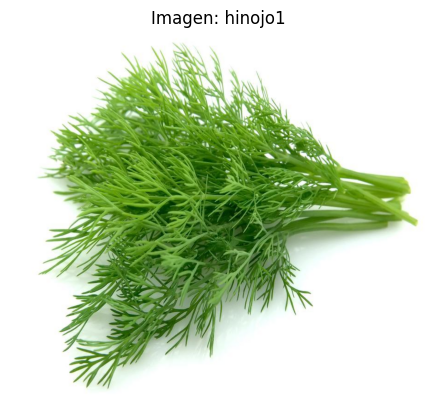

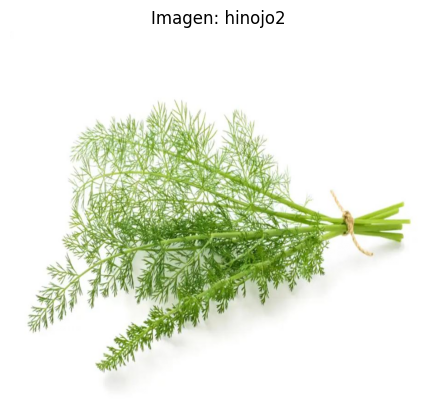

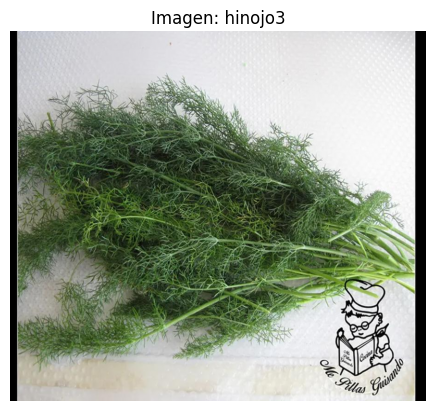

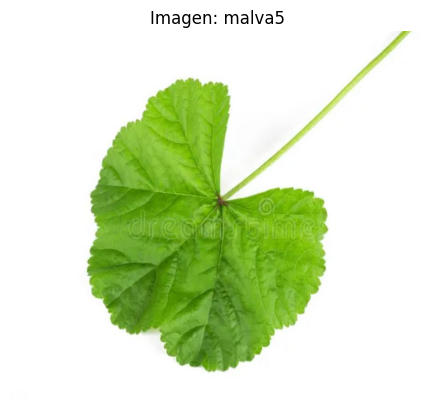

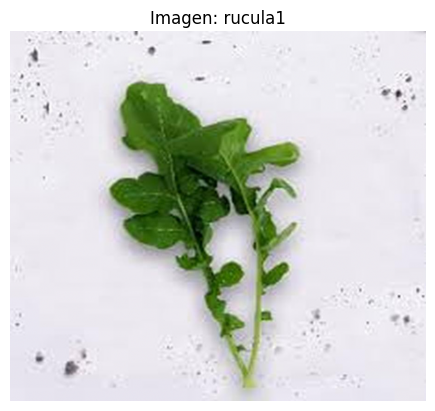

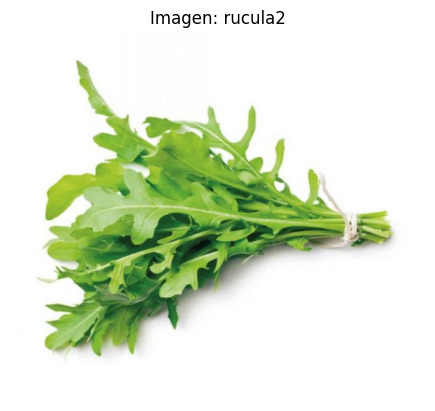

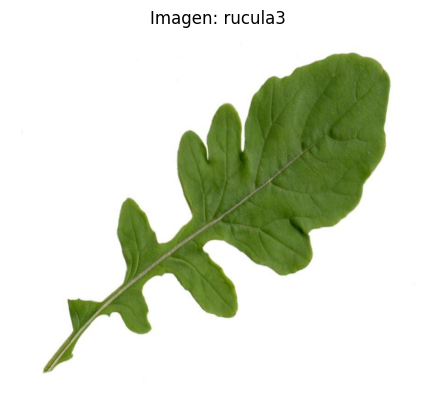

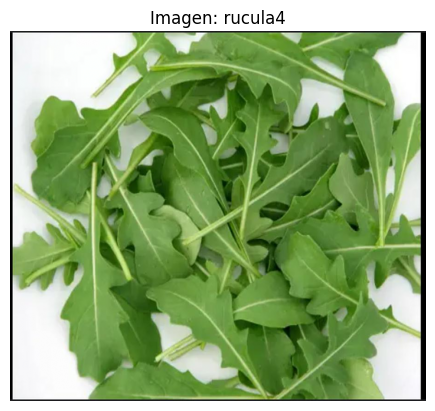

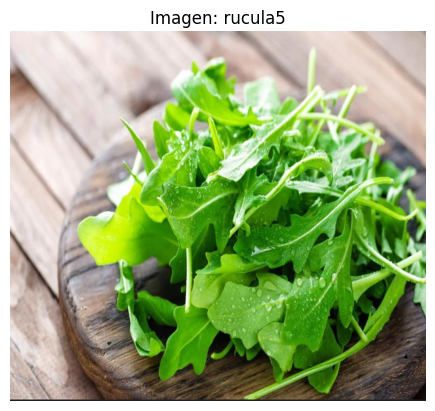

In [4]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Definir la etiqueta para las imágenes (puedes cambiar esto según tu necesidad)
etiqueta = 0  # Cambia esto según la etiqueta que desees asignar

# Lista de nombres de imágenes
imagenes_nombres = [
    'hinojo1', 'hinojo2', 'hinojo3',
    'malva5',
    'rucula1', 'rucula2', 'rucula3', 'rucula4', 'rucula5'
]

# Ruta base de las imágenes
ruta_base = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim/'

# Inicializar una lista para guardar los pares (imagen_tensor, etiqueta)
pares_imagen_etiqueta = []

for nombre_imagen in imagenes_nombres:
    # Crear la ruta completa de la imagen
    imagen_path = ruta_base + nombre_imagen + '.jpg'

    # Cargar la imagen
    imagen = Image.open(imagen_path)

    # Convertir la imagen a un array de NumPy
    imagen_array = np.array(imagen)

    # Normalizar la imagen (valores entre 0 y 1)
    imagen_normalizada = imagen_array / 255.0

    # Aplanar la imagen (convertirla a un vector unidimensional)
    imagen_aplanada = imagen_normalizada.flatten()

    # Convertir a tensor de PyTorch
    imagen_tensor = torch.tensor(imagen_aplanada, dtype=torch.float32)

    # Guardar el par (imagen_tensor, etiqueta)
    pares_imagen_etiqueta.append((imagen_tensor, etiqueta))

    # Imprimir la imagen usando pyplot
    plt.imshow(imagen_normalizada)
    plt.title(f'Imagen: {nombre_imagen}')
    plt.axis('off')
    plt.show()

# Si deseas, ahora puedes trabajar con la lista pares_imagen_etiqueta

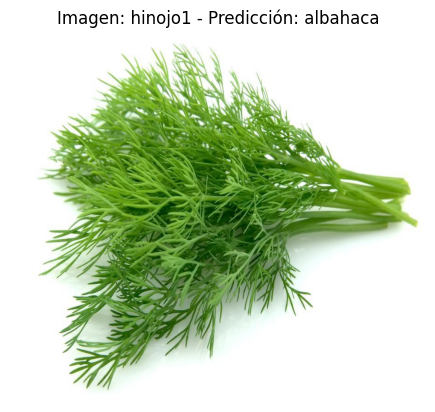

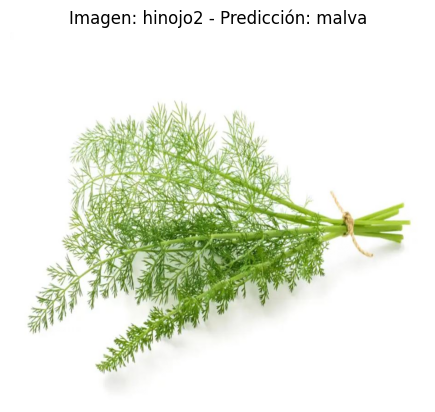

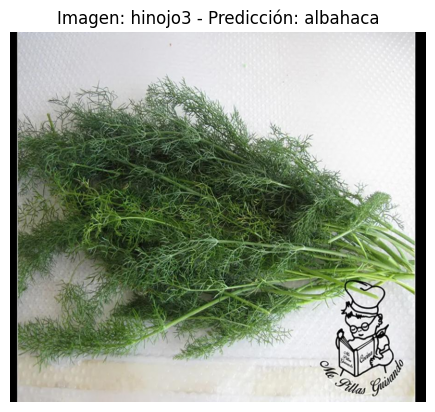

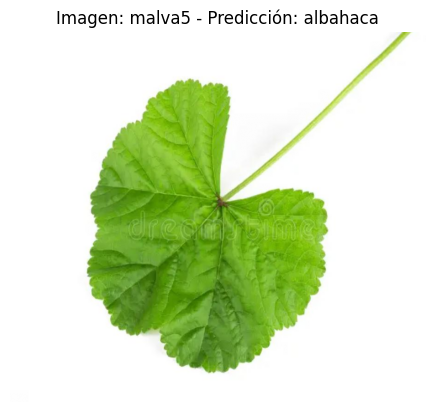

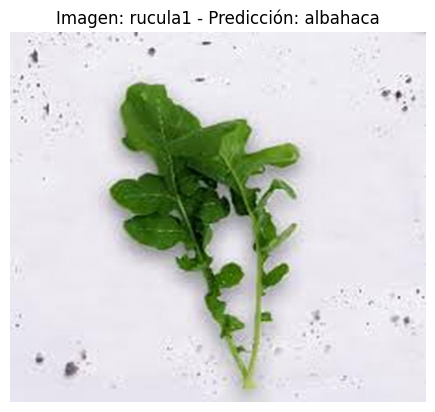

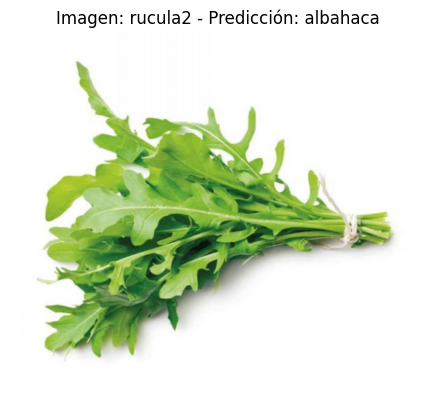

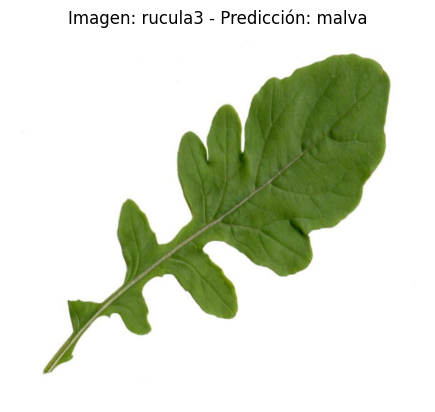

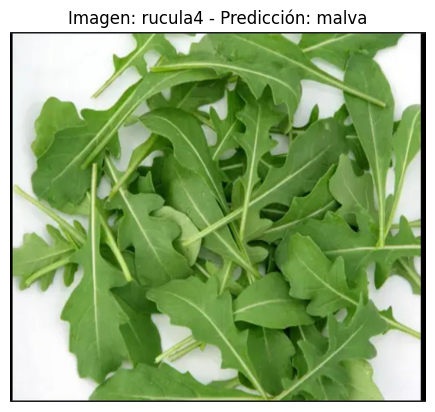

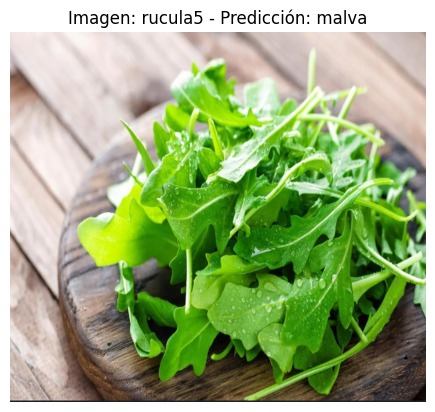

In [8]:
import torch
import numpy as np
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt

# Definir las etiquetas correspondientes
etiquetas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Lista de nombres de imágenes
imagenes_nombres = [
    'hinojo1', 'hinojo2', 'hinojo3',
    'malva5',
    'rucula1', 'rucula2', 'rucula3', 'rucula4', 'rucula5'
]

# Ruta base de las imágenes
ruta_base = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim/'

# Inicializar una lista para guardar los pares (imagen_tensor, etiqueta)
pares_imagen_etiqueta = []

# Definición del modelo
def build_model(D_in=900*800*3, H=50, D_out=5):
    return nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, H),  # Capa adicional con mismas unidades neuronales
        nn.ReLU(),
        nn.Linear(H, D_out)
    ).cuda()  # Mover el modelo a la GPU

# Cargar el modelo entrenado
model = build_model()
model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt'))
model.eval()

for nombre_imagen in imagenes_nombres:
    # Crear la ruta completa de la imagen
    imagen_path = ruta_base + nombre_imagen + '.jpg'

    # Cargar la imagen
    imagen = Image.open(imagen_path)

    # Convertir la imagen a un array de NumPy
    imagen_array = np.array(imagen)

    # Normalizar la imagen (valores entre 0 y 1)
    imagen_normalizada = imagen_array / 255.0

    # Aplanar la imagen (convertirla a un vector unidimensional)
    imagen_aplanada = imagen_normalizada.flatten()

    # Convertir a tensor de PyTorch y moverlo a la GPU
    imagen_tensor = torch.tensor(imagen_aplanada, dtype=torch.float32).cuda()

    # Añadir dimensión para batch size (ya que el modelo espera un batch)
    imagen_tensor = imagen_tensor.unsqueeze(0)

    # Realizar la predicción
    with torch.no_grad():
        salida = model(imagen_tensor)
        prediccion = torch.argmax(salida, dim=1).item()

    # Mostrar la imagen
    plt.imshow(imagen_normalizada)
    plt.title(f'Imagen: {nombre_imagen} - Predicción: {etiquetas[prediccion]}')
    plt.axis('off')
    plt.show()

    # Guardar el par (imagen_tensor, prediccion)
    pares_imagen_etiqueta.append((imagen_tensor, prediccion))

# Ahora puedes trabajar con la lista pares_imagen_etiqueta que contiene cada imagen y su predicción


In [69]:
from PIL import Image
import numpy as np

# Definir la etiqueta para la imagen
etiqueta = 0  # Cambia esto según la etiqueta que desees asignar

# Ruta completa de la imagen
imagen_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/malvavisco/unnamed.jpg'

# Cargar la imagen
imagen = Image.open(imagen_path)

# Convertir la imagen a un array de NumPy
imagen_array = np.array(imagen)

# Crear el par (imagen_array, etiqueta)
par_imagen_etiqueta = (imagen_array, etiqueta)
imagen = par_imagen_etiqueta[0]/255
imagen = imagen.flatten()
imagen_tensor = torch.tensor(imagen, dtype=torch.float32)


In [70]:
import torch

# Cargar el modelo
model_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/hojasFinal.pt'
model = build_model()  # Inicializa tu modelo
model.load_state_dict(torch.load(model_path))
model.eval()

# Verifica si hay una GPU disponible y mueve el modelo allí si es así
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Mueve el modelo a la GPU si está disponible

# Asegúrate de que la imagen_tensor también esté en el mismo dispositivo
imagen_tensor = imagen_tensor.to(device)  # Mueve el tensor a la GPU si está disponible

# Añadir una dimensión de batch si es necesario
if imagen_tensor.dim() == 1:
    imagen_tensor = imagen_tensor.unsqueeze(0)  # Agregar una dimensión de batch

# Realizar la inferencia
with torch.no_grad():
    output = model(imagen_tensor)
    if output.dim() == 2:  # Si la salida tiene dos dimensiones (batch_size, num_classes)
        _, predicted = torch.max(output, 1)
    elif output.dim() == 1:  # Si la salida es unidimensional
        predicted = torch.argmax(output)
    else:
        raise ValueError("La salida del modelo tiene una forma inesperada.")

print(f'Predicción: {predicted.item()}')

Predicción: 0
